In [3]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=76b23adc9b429a558ab3f3d383a9561a5322cb0ef7edf4f7e8ba6b9c4d4e5fec
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [4]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 30.5 MB/s eta 0:00:00


In [5]:
import legacy_for_img

import os
import sys

import pandas as pd
import numpy as np
import astropy.table as atpy

import torch, numpy
import matplotlib.pyplot as plt, pandas as pd, numpy as np
from torchvision import datasets, models, transforms, utils
import skimage, astropy.coordinates as coord, astropy.units as u
from torch.utils.data import Dataset, DataLoader

from astroquery.vizier import Vizier

# **Collect data**

In [5]:
!pip install pixell

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.3/213.3 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 17.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of coverage[toml] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.0/234.0 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.0/234.0 kB 12.0 MB/s et

In [6]:
from pixell import enmap
from astropy import units as u
from astropy.coordinates import Angle
import astropy.coordinates as coord

##**Import data and prepare**

###Read ACT dr5

In [36]:
# Карта покрытия ACT
!wget https://lambda.gsfc.nasa.gov/data/suborbital/ACT/ACT_dr5/maps/act_planck_dr5.01_s08s18_AA_f220_daynight_fullivar.fits

--2024-04-24 20:22:48--  https://lambda.gsfc.nasa.gov/data/suborbital/ACT/ACT_dr5/maps/act_planck_dr5.01_s08s18_AA_f220_daynight_fullivar.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68, 2001:4d0:2310:150::68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1114565760 (1.0G)
Saving to: ‘act_planck_dr5.01_s08s18_AA_f220_daynight_fullivar.fits’

act_planck_dr5.01_s 100%[===================>]   1.04G  1.73MB/s    in 10m 26s 

2024-04-24 20:33:14 (1.70 MB/s) - ‘act_planck_dr5.01_s08s18_AA_f220_daynight_fullivar.fits’ saved [1114565760/1114565760]



In [37]:
# Скопления
!wget https://lambda.gsfc.nasa.gov/data/suborbital/ACT/ACT_dr5/DR5_cluster-catalog_v1.1.fits

--2024-04-24 20:33:14--  https://lambda.gsfc.nasa.gov/data/suborbital/ACT/ACT_dr5/DR5_cluster-catalog_v1.1.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68, 2001:4d0:2310:150::68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10612800 (10M)
Saving to: ‘DR5_cluster-catalog_v1.1.fits’

DR5_cluster-catalog 100%[===================>]  10.12M  1.72MB/s    in 7.0s    

2024-04-24 20:33:22 (1.44 MB/s) - ‘DR5_cluster-catalog_v1.1.fits’ saved [10612800/10612800]



In [38]:
dr5 = atpy.Table().read('/content/DR5_cluster-catalog_v1.1.fits').to_pandas().reset_index(drop=True)
dr5['name'] = [str(dr5.loc[i, 'name'], encoding='utf-8') for i in range(len(dr5))]

In [39]:
dr5

,name,RADeg,decDeg,SNR,y_c,err_y_c,fixed_SNR,fixed_y_c,fixed_err_y_c,template,...,RMDESY3_LAMBDA_CHISQ_E,CAMIRA,CAMIRA_N_mem,opt_RADeg,opt_decDeg,opt_positionSource,notes,knownLens,knownLensRefCode,warnings
0,ACT-CL J0000.0-3837,0.020898,-38.626732,4.793987,0.328228,0.068467,4.632617,0.466290,0.100654,b'Arnaud_M4e14_z0p2',...,2.881614,False,-99.000,0.023776,-38.626737,b'RMDESY3',NaN,NaN,NaN,NaN
1,ACT-CL J0000.2-4357,0.060601,-43.955494,7.678747,0.600471,0.078199,7.576226,0.734902,0.097001,b'Arnaud_M1e14_z0p2',...,4.824760,False,-99.000,0.071517,-43.957593,b'Vis-BCG',NaN,NaN,NaN,NaN
2,ACT-CL J0000.3-2805,0.089900,-28.091249,5.665297,0.681096,0.120223,4.661066,0.897845,0.192626,b'Arnaud_M8e14_z0p2',...,-99.000000,False,-99.000,0.096956,-28.103488,b'Vis-BCG',NaN,NaN,NaN,NaN
3,ACT-CL J0000.3-3936,0.083333,-39.604169,4.058639,0.277785,0.068443,3.906909,0.388540,0.099449,b'Arnaud_M4e14_z0p2',...,4.679606,False,-99.000,0.070362,-39.599268,b'RMDESY3',NaN,NaN,NaN,NaN
4,ACT-CL J0000.4-0102,0.113533,-1.044811,4.997832,0.296879,0.059402,4.450222,0.377924,0.084922,b'Arnaud_M8e14_z0p2',...,3.726360,False,-99.000,0.116001,-1.043040,b'Vis-BCG',NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,ACT-CL J2358.9-4354,359.727531,-43.905169,8.750438,0.552651,0.063157,8.031790,0.777166,0.096761,b'Arnaud_M8e14_z0p2',...,6.078207,False,-99.000,359.721236,-43.908118,b'RMDESY3',NaN,NaN,NaN,NaN
4191,ACT-CL J2359.5+0208,359.887357,2.138787,9.269819,0.624884,0.067411,8.896495,0.788134,0.088589,b'Arnaud_M2e14_z0p2',...,3.652331,True,64.955,359.889745,2.139955,b'Vis-BCG',NaN,"b'235933+020823,D20-2'","b'Jae20,H20a,D20'",NaN
4192,ACT-CL J2359.5-4608,359.889739,-46.143628,4.623512,1.126720,0.243693,4.236508,0.418773,0.098849,b'Arnaud_M1e14_z1p2',...,-99.000000,False,-99.000,359.907185,-46.135779,b'RMDESY3ACT',NaN,NaN,NaN,NaN
4193,ACT-CL J2359.7-5010,359.929865,-50.169857,8.924190,1.439237,0.161274,8.831121,0.921787,0.104379,b'Arnaud_M4e14_z1p2',...,4.243377,False,-99.000,359.928406,-50.167165,b'RMDESY3',NaN,NaN,NaN,NaN


In [40]:
radegDr5 = dr5.loc[:, "RADeg"]
decdegDr5 = dr5.loc[:, "decDeg"]

###Read MACDoWs

In [41]:
# the catalogue of MaCDoWs in VizieR
CATALOGUE = "J/ApJS/240/33"

In [42]:
catalog_list = Vizier.find_catalogs(CATALOGUE)

In [43]:
Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list.keys())
catalogs

TableList with 4 tables:
	'0:J/ApJS/240/33/table3' with 26 column(s) and 2433 row(s) 
	'1:J/ApJS/240/33/table4' with 16 column(s) and 250 row(s) 
	'2:J/ApJS/240/33/table5' with 22 column(s) and 156 row(s) 
	'3:J/ApJS/240/33/table6' with 9 column(s) and 1716 row(s) 

In [44]:
interesting_table = catalogs['J/ApJS/240/33/table3']
madCows_table = interesting_table.to_pandas().reset_index(drop=True)
madCows_table = madCows_table.iloc[:, [1, 2, 3]]
madCows_table

,Name,RAJ2000,DEJ2000
0,MOO J0001+1428,00 01 09.1,+14 28 57
1,MOO J0001+3644,00 01 09.8,+36 44 38
2,MOO J0001+3440,00 01 38.5,+34 40 50
3,MOO J0001-2447,00 01 49.4,-24 47 32
4,MOO J0001-2533,00 01 54.7,-25 33 35
...,...,...,...
2428,MOO J2358+1836,23 58 48.3,+18 36 34
2429,MOO J2358-2602,23 58 49.0,-26 02 11
2430,MOO J2359+2413,23 59 52.2,+24 13 44
2431,MOO J2359+1329,23 59 53.1,+13 29 02


In [45]:
def toHmsFormat(s):
    l = s.split()
    s = l[0]+'h'+l[1]+'m'+l[2]+'s'
    return s

def toDmsFormat(s):
    l = s.split()
    s = l[0]+'d'+l[1]+'m'+l[2]+'s'
    return s

In [46]:
radegMC = madCows_table.iloc[:, 1].apply(lambda x: Angle(toHmsFormat(x)).degree)
decdegMC = madCows_table.iloc[:, 2].apply(lambda x: Angle(toDmsFormat(x)).degree)

In [47]:
clustersDr5_MC = pd.DataFrame(
    {
        'name': pd.concat([dr5['name'], madCows_table['Name']], ignore_index=True),
        'RADeg': pd.concat([radegDr5, radegMC], ignore_index=True),
        'decDeg': pd.concat([decdegDr5, decdegMC], ignore_index=True)
    }
)
clustersDr5_MC

,name,RADeg,decDeg
0,ACT-CL J0000.0-3837,0.020898,-38.626732
1,ACT-CL J0000.2-4357,0.060601,-43.955494
2,ACT-CL J0000.3-2805,0.089900,-28.091249
3,ACT-CL J0000.3-3936,0.083333,-39.604169
4,ACT-CL J0000.4-0102,0.113533,-1.044811
...,...,...,...
6623,MOO J2358+1836,359.701250,18.609444
6624,MOO J2358-2602,359.704167,-26.036389
6625,MOO J2359+2413,359.967500,24.228889
6626,MOO J2359+1329,359.971250,13.483889


###Read Gaia

In [6]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

GACS is operational after the datacentre migration but DataLink is not yet fully operational


In [7]:
from astroquery.gaia import Gaia
gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')
print(gaiadr3_table)

TAP Table name: gaiadr3.gaiadr3.gaia_source
Description: This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 152


In [26]:
job = Gaia.launch_job_async("select * from gaiadr3.gaia_source "
                            "where random_index between 0 and 1000000 and phot_g_mean_mag < 12 and parallax is not null")
gaiaResponse = job.get_results().to_pandas()
data_gaia = gaiaResponse.sample(n=1000).reset_index(drop=True).rename(columns={"DESIGNATION": "Component_name", "ra": "RA", "dec": "DEC"})
# random_samples.to_csv('./data/Data224/test_gaia.csv',index=False)
data_gaia

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


,solution_id,Component_name,SOURCE_ID,random_index,ref_epoch,RA,ra_error,DEC,dec_error,parallax,...,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
0,1636148068921376768,Gaia DR3 4204452131551261056,4204452131551261056,594032,2016.0,286.380706,0.012942,-8.293900,0.010681,0.557679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,1636148068921376768,Gaia DR3 3070538575941028480,3070538575941028480,739829,2016.0,123.436044,0.012591,-2.181759,0.011356,0.614363,...,0.2209,0.1862,0.2307,0.1744,0.1468,0.1821,0.0924,0.0777,0.0966,MARCS
2,1636148068921376768,Gaia DR3 4592859944117611776,4592859944117611776,89071,2016.0,273.416095,0.009519,32.661630,0.011101,2.542461,...,0.0163,0.0077,0.0269,0.0139,0.0065,0.0229,0.0075,0.0035,0.0123,MARCS
3,1636148068921376768,Gaia DR3 856288527452855552,856288527452855552,487944,2016.0,169.256725,0.008337,56.508723,0.011026,4.464497,...,0.0199,0.0029,0.0592,0.0169,0.0025,0.0506,0.0091,0.0013,0.0271,MARCS
4,1636148068921376768,Gaia DR3 6119171543073917184,6119171543073917184,273134,2016.0,218.584385,0.016079,-35.001894,0.015558,1.010936,...,0.2673,0.2638,0.2705,0.2065,0.2038,0.2091,0.1073,0.1058,0.1086,MARCS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1636148068921376768,Gaia DR3 2204820228757406464,2204820228757406464,63580,2016.0,332.494813,0.013090,61.612449,0.012579,0.841257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
996,1636148068921376768,Gaia DR3 6790270211812662144,6790270211812662144,768174,2016.0,322.153587,0.021751,-26.438053,0.018021,1.552908,...,0.0476,0.0433,0.0546,0.0407,0.0371,0.0468,0.0220,0.0200,0.0253,MARCS
997,1636148068921376768,Gaia DR3 4146973168344933888,4146973168344933888,720914,2016.0,270.812498,0.032696,-14.989363,0.028752,0.872957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
998,1636148068921376768,Gaia DR3 5537835384415918848,5537835384415918848,65372,2016.0,118.995310,0.012407,-39.278780,0.012879,0.816450,...,0.1103,0.1027,0.1136,0.0849,0.0790,0.0875,0.0453,0.0422,0.0467,PHOENIX


In [20]:
# Gaia.remove_jobs(["1713869653213O", "1713869649909O"])

##**Create negative class for dr5**

In [48]:
path = '/content/'

In [49]:
!pwd

/content


In [50]:
imap_98 = enmap.read_fits(path + 'act_planck_dr5.01_s08s18_AA_f220_daynight_fullivar.fits')[0]

In [51]:
positions = np.array(np.rad2deg(imap_98.posmap()))
ras, decs = positions[1], positions[0]
ras, decs = ras.ravel(), decs.ravel()
rac = ras[np.random.choice(len(ras), size=100000, replace=False)] + np.random.normal(-0.1,0.1, 100000)
dec = decs[np.random.choice(len(decs), size=100000, replace=False)] + np.random.normal(-0.1,0.1, 100000)

In [52]:
ra = []
de = []
name = []
n = 0
c = coord.SkyCoord(ra = clustersDr5_MC['RADeg']*u.degree, dec = clustersDr5_MC['decDeg']*u.degree, unit='deg')
for i in range(len(rac)):
    coords = coord.SkyCoord(ra=rac[i]*u.degree, dec=dec[i]*u.degree, frame='icrs')
    idx, d2d, d3d = coords.match_to_catalog_sky(c)
    if d2d.arcmin < 10:
        continue
    b = coords.galactic.b.degree
    l = coords.galactic.l.degree
    if b > 20:
        ra.append(coords.ra.degree)
        de.append(coords.dec.degree)
        name.append(f'Rand {l:.3f}{b:+.3f}')
        n += 1
    if n == len(dr5):
        break

In [53]:
dfNegativeFromDr5 = pd.DataFrame({'Component_name': name, 'RA': ra, 'DEC': de})

In [54]:
dfNegativeFromDr5

,Component_name,RA,DEC
0,Rand 298.705+29.313,188.443228,-33.413230
1,Rand 26.130+63.370,221.357949,21.122502
2,Rand 355.674+46.295,226.256796,-2.444305
3,Rand 356.153+41.083,230.224419,-5.854295
4,Rand 313.845+30.897,203.789856,-31.046372
...,...,...,...
4190,Rand 41.322+23.208,265.194163,17.399856
4191,Rand 280.164+41.941,175.261797,-17.797730
4192,Rand 344.573+40.731,223.831094,-11.915916
4193,Rand 355.875+37.579,232.606343,-8.450725


##**Final data_dr5 with positive and negative classes**

In [55]:
clusters = dr5
clusters = clusters[['name', 'RADeg', 'decDeg']].reset_index(drop=True)
clusters.rename(columns = {'name': 'Component_name', 'RADeg': 'RA', 'decDeg': 'DEC'}, inplace = True )
clusters['target'] = 1
random = dfNegativeFromDr5
random['target'] = 0
data_dr5 = pd.concat([clusters, random]).reset_index(drop=True)
data_dr5

,Component_name,RA,DEC,target
0,ACT-CL J0000.0-3837,0.020898,-38.626732,1
1,ACT-CL J0000.2-4357,0.060601,-43.955494,1
2,ACT-CL J0000.3-2805,0.089900,-28.091249,1
3,ACT-CL J0000.3-3936,0.083333,-39.604169,1
4,ACT-CL J0000.4-0102,0.113533,-1.044811,1
...,...,...,...,...
8385,Rand 41.322+23.208,265.194163,17.399856,0
8386,Rand 280.164+41.941,175.261797,-17.797730,0
8387,Rand 344.573+40.731,223.831094,-11.915916,0
8388,Rand 355.875+37.579,232.606343,-8.450725,0


##**Create negative class from Macdows**

In [56]:
def createNegativeClassRac(x):
    randChoice = np.random.normal(-15, 15)
    while (x + randChoice) > 360 or (x + randChoice) < 0:
      randChoice = np.random.normal(-15, 15)
    return x + randChoice


def createNegativeClassDec(x):
    randChoice = np.random.normal(-15, 15)
    while (x + randChoice) > 90 or (x + randChoice) < -90:
        randChoice = np.random.normal(-15, 15)
    return x + randChoice

In [57]:
rac = radegMC[np.random.choice(len(radegMC), size=10000)].apply(lambda x: createNegativeClassRac(x))
dec = decdegMC[np.random.choice(len(decdegMC), size=10000)].apply(lambda x: createNegativeClassDec(x))
rac, dec = rac.ravel(), dec.ravel()

In [58]:
ra = []
de = []
name = []
n = 0
c = coord.SkyCoord(ra = clustersDr5_MC['RADeg']*u.degree, dec = clustersDr5_MC['decDeg']*u.degree, unit='deg')
for i in range(len(rac)):
    coords = coord.SkyCoord(ra=rac[i]*u.degree, dec=dec[i]*u.degree, frame='icrs')
    idx, d2d, d3d = coords.match_to_catalog_sky(c)
    if d2d.arcmin < 10:
        continue
    b = coords.galactic.b.degree
    l = coords.galactic.l.degree
    if b > 20:
        ra.append(coords.ra.degree)
        de.append(coords.dec.degree)
        name.append(f'Rand {l:.3f}{b:+.3f}')
        n += 1
    if n == len(madCows_table):
        break

In [59]:
dfNegativeFromMacdows = pd.DataFrame({'Component_name': name, 'RA': ra, 'DEC': de})
dfNegativeFromMacdows

,Component_name,RA,DEC
0,Rand 62.875+74.392,209.185246,33.965295
1,Rand 34.636+83.123,200.587073,27.121099
2,Rand 242.758+27.330,141.224508,-10.596989
3,Rand 254.121+71.160,178.353431,14.021410
4,Rand 193.366+49.457,146.153980,32.700553
...,...,...,...
2428,Rand 308.959+47.632,197.061507,-15.043185
2429,Rand 175.895+41.091,134.998424,44.726083
2430,Rand 195.457+44.524,140.603610,30.682282
2431,Rand 301.562+43.036,191.794774,-19.824832


##**Final data_macdows with positive and negative classes**



In [60]:
clusters = pd.DataFrame({'Component_name': madCows_table['Name'], 'RA': radegMC, 'DEC': decdegMC})
clusters['target'] = 1
random = dfNegativeFromMacdows
random['target'] = 0
data_macdows = pd.concat([clusters, random]).reset_index(drop=True)
data_macdows

,Component_name,RA,DEC,target
0,MOO J0001+1428,0.287917,14.482500,1
1,MOO J0001+3644,0.290833,36.743889,1
2,MOO J0001+3440,0.410417,34.680556,1
3,MOO J0001-2447,0.455833,-24.792222,1
4,MOO J0001-2533,0.477917,-25.559722,1
...,...,...,...,...
4861,Rand 308.959+47.632,197.061507,-15.043185,0
4862,Rand 175.895+41.091,134.998424,44.726083,0
4863,Rand 195.457+44.524,140.603610,30.682282,0
4864,Rand 301.562+43.036,191.794774,-19.824832,0


In [61]:
data_macdows.to_csv('data_macdows_full')

#**Test val and test data**

In [10]:
folderlocation = '/content/data/Data224/'

path = folderlocation
os.makedirs(path, exist_ok=True)

path = folderlocation + 'train/'
os.makedirs(path, exist_ok=True)

path = folderlocation + 'val/'
os.makedirs(path, exist_ok=True)

path = folderlocation + 'test_dr5/'
os.makedirs(path, exist_ok=True)

path = folderlocation + 'test_macdows/'
os.makedirs(path, exist_ok=True)

path = folderlocation + 'test_gaia'
os.makedirs(path, exist_ok=True)

for iter1 in range(2):
    path = folderlocation + 'train/'+str(iter1)
    os.makedirs(path, exist_ok=True)

    path = folderlocation + 'val/'+str(iter1)
    os.makedirs(path, exist_ok=True)

    path = folderlocation + 'test_dr5/'+str(iter1)
    os.makedirs(path, exist_ok=True)

    path = folderlocation + 'test_macdows/'+str(iter1)
    os.makedirs(path, exist_ok=True)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data_dr5.index, data_dr5['target'], test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [64]:
X_train

Index([4265, 1148, 2390,   17, 4348, 8141, 6013, 1991,  497, 8165,
       ...
        514, 7225, 2109, 6760, 5800,   22, 6545, 3752, 8247, 1166],
      dtype='int64', length=5034)

In [65]:
y_train

4265    0
1148    1
2390    1
17      1
4348    0
       ..
22      1
6545    0
3752    1
8247    0
1166    1
Name: target, Length: 5034, dtype: int64

In [66]:
train = data_dr5.iloc[X_train].reset_index(drop=True)
val = data_dr5.iloc[X_val].reset_index(drop=True)
test_dr5 = data_dr5.iloc[X_test].reset_index(drop=True)

In [67]:
train_0 = train[train.target == 0].reset_index(drop=True)
train_1 = train[train.target == 1].reset_index(drop=True)

val_0 = val[val.target == 0].reset_index(drop=True)
val_1 = val[val.target == 1].reset_index(drop=True)

test_dr5_0 = test_dr5[test_dr5.target == 0].reset_index(drop=True)
test_dr5_1 = test_dr5[test_dr5.target == 1].reset_index(drop=True)

test_macdows_0 = data_macdows[data_macdows.target == 0].reset_index(drop=True)
test_macdows_1 = data_macdows[data_macdows.target == 1].reset_index(drop=True)

In [ ]:
legacy_for_img.grab_cutouts(target_file=train_0, output_dir='./data/Data224/train/0',
                                          survey='unwise-neo7', imgsize_pix = 224, file_format='jpg')

legacy_for_img.grab_cutouts(target_file=train_1, output_dir='./data/Data224/train/1',
                                          survey='unwise-neo7', imgsize_pix = 224, file_format='jpg')

legacy_for_img.grab_cutouts(target_file=val_0, output_dir='./data/Data224/val/0',
                                          survey='unwise-neo7', imgsize_pix = 224, file_format='jpg')

legacy_for_img.grab_cutouts(target_file=val_1, output_dir='./data/Data224/val/1',
                                          survey='unwise-neo7', imgsize_pix = 224, file_format='jpg')

legacy_for_img.grab_cutouts(target_file=test_dr5_0, output_dir='./data/Data224/test_dr5/0',
                                          survey='unwise-neo7', imgsize_pix = 224, file_format='jpg')

legacy_for_img.grab_cutouts(target_file=test_dr5_1, output_dir='./data/Data224/test_dr5/1',
                                          survey='unwise-neo7', imgsize_pix = 224, file_format='jpg')

legacy_for_img.grab_cutouts(target_file=test_macdows_0, output_dir='./data/Data224/test_macdows/0',
                                          survey='unwise-neo7', imgsize_pix = 224, file_format='jpg')

legacy_for_img.grab_cutouts(target_file=test_macdows_1, output_dir='./data/Data224/test_macdows/1',
                                          survey='unwise-neo7', imgsize_pix = 224, file_format='jpg')

Выходные данные были обрезаны до нескольких последних строк (5000).
Failed attempt 1 to download ./data/Data224/test_dr5/1/519.jpg with an HTTPError
Failed attempt 0 to download ./data/Data224/test_dr5/1/520.jpg with an HTTPError
Failed attempt 0 to download ./data/Data224/test_dr5/1/533.jpg with an HTTPError
Failed attempt 0 to download ./data/Data224/test_dr5/1/536.jpg with an HTTPError
Failed attempt 0 to download ./data/Data224/test_dr5/1/535.jpg with an HTTPError
Failed attempt 0 to download ./data/Data224/test_dr5/1/522.jpg with an HTTPError
Failed attempt 0 to download ./data/Data224/test_dr5/1/526.jpg with an HTTPError
Failed attempt 0 to download ./data/Data224/test_dr5/1/532.jpg with an HTTPError
Failed attempt 0 to download ./data/Data224/test_dr5/1/534.jpg with an HTTPError
Failed attempt 0 to download ./data/Data224/test_dr5/1/531.jpg with an HTTPError
Failed attempt 0 to download ./data/Data224/test_dr5/1/529.jpg with an HTTPError
Failed attempt 0 to download ./data/Data2

*In case collection of pictures is taking too much time, for test purposes use your own file*

In [ ]:
# # To download collected data to your computer use:
# !zip -r /content/collectedLegacyData.zip /content/data
# from google.colab import files
# files.download("/content/collectedLegacyData.zip")

#**Dataloader**


In [68]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomRotation(15,),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
    ]),
     'test_dr5': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
    ]),
      'test_macdows': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
    ]),
}

In [69]:
folderlocation = '/content/data/Data224/'
data_dir = folderlocation
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val', 'test_dr5', 'test_macdows']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True, num_workers=3)
              for x in ['train', 'val', 'test_dr5', 'test_macdows']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test_dr5', 'test_macdows']}

class_names = image_datasets['train'].classes

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [70]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [71]:
device

device(type='cpu')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


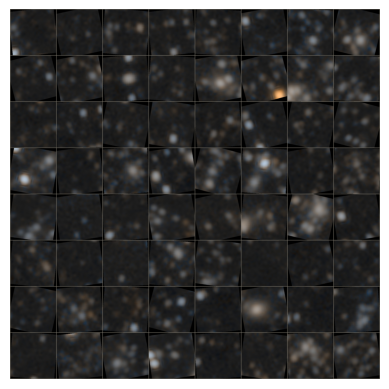

In [72]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = numpy.array([0.507, 0.487, 0.441])
    std = numpy.array([0.267, 0.256, 0.276])
    inp = std * inp + mean
    inp = numpy.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = utils.make_grid(inputs)

imshow(out)

In [73]:
!ls /content/data/Data224/train/0 -1 | wc -l
!ls /content/data/Data224/train/1 -1 | wc -l

!ls /content/data/Data224/val/0 -1 | wc -l
!ls /content/data/Data224/val/1 -1 | wc -l

!ls /content/data/Data224/test_dr5/0 -1 | wc -l
!ls /content/data/Data224/test_dr5/1 -1 | wc -l

!ls /content/data/Data224/test_macdows/0 -1 | wc -l
!ls /content/data/Data224/test_macdows/1 -1 | wc -l

2488
2546
844
834
863
815
2433
2433


#**Pixel prediction**

In [11]:
import legacy_for_img

from PIL import Image
from pixell import enmap

In [12]:
class ImageSet(Dataset):
    def __init__(self, dir, transform=None):
        self.data_dir = dir
        self.images = os.listdir(dir)
        self.images.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
        self.transform = transform

    # Defining the length of the dataset
    def __len__(self):
        return len(self.images)

    # Defining the method to get an item from the dataset
    def __getitem__(self, index):
        image_path = os.path.join(self.data_dir, self.images[index])
        image = Image.open(image_path)

        # Applying the transform
        if self.transform:
            image = self.transform(image)

        return image

In [13]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [14]:
import timm

In [15]:
data_gaia

,Component_name,RA,DEC
0,Gaia DR3 4254855638691896832,282.557713,-5.458468
1,Gaia DR3 1823048552984064128,299.748125,19.286322
2,Gaia DR3 5866024074715934592,209.902218,-62.651208
3,Gaia DR3 6109291292923085952,210.858709,-43.980062
4,Gaia DR3 6108620320248056704,207.740120,-44.145753
...,...,...,...
995,Gaia DR3 4254930817767190784,283.408747,-5.102942
996,Gaia DR3 1822809001186536448,302.578851,20.414226
997,Gaia DR3 5247190789963049088,140.008502,-67.412542
998,Gaia DR3 1822935582463578880,299.159953,19.023229


In [17]:
dire = './data/Data224/test_gaia'

In [18]:
legacy_for_img.grab_cutouts(target_file=data_gaia, output_dir=dire,
                                          survey='unwise-neo7', imgsize_pix = 224*8, file_format='jpg' )

50


In [74]:
df = test_dr5

In [19]:
model_ft = timm.create_model('resnet18', pretrained=True, num_classes=1)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [20]:
def predict_folder(folder, device='cuda:0'):
    model = model_ft.to(device)
    # model.load_state_dict(torch.load('/content/ResNet_epoch_20.pth', map_location=device))
    loaded_model = torch.load('/content/ResNet_epoch_20.pth', map_location=device)
    model.load_state_dict(loaded_model["model_state_dict"])
    model.eval()

    trans = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
    ])

    data = ImageSet(folder, transform=trans)
    data_load = DataLoader(data, batch_size = 5, shuffle=False)
    probs = np.array([])
    for i, data in enumerate(data_load):
        if hasattr(torch.cuda, 'empty_cache'):
            torch.cuda.empty_cache()
        img = data.to(device)

        #model prediction
        outputs = model(img)
        probs = np.append(probs, outputs.data.cpu().detach().numpy())
    # return np.array(probs)
    return np.array(probs)

In [75]:
clust = df[df.target==1].reset_index(drop=True)
clust['prob'] = predict_folder('/content/data/Data224/test_dr5/1', device=device)
rand = df[df.target==0].reset_index(drop=True)
rand['prob'] = predict_folder('/content/data/Data224/test_dr5/0', device=device)

In [21]:
gaia = data_gaia

In [24]:
gaia['prob'] =  predict_folder('/content/data/Data224/test_gaia', device=device)

In [25]:
gaia

,Component_name,RA,DEC,prob
0,Gaia DR3 4254855638691896832,282.557713,-5.458468,-0.109597
1,Gaia DR3 1823048552984064128,299.748125,19.286322,0.012633
2,Gaia DR3 5866024074715934592,209.902218,-62.651208,-0.090012
3,Gaia DR3 6109291292923085952,210.858709,-43.980062,-0.009112
4,Gaia DR3 6108620320248056704,207.740120,-44.145753,0.042274
...,...,...,...,...
995,Gaia DR3 4254930817767190784,283.408747,-5.102942,-0.029755
996,Gaia DR3 1822809001186536448,302.578851,20.414226,-0.042107
997,Gaia DR3 5247190789963049088,140.008502,-67.412542,-0.019457
998,Gaia DR3 1822935582463578880,299.159953,19.023229,0.015025


In [76]:
clust

,Component_name,RA,DEC,target,prob
0,ACT-CL J0052.7-4551,13.195057,-45.860752,1,0.054665
1,ACT-CL J0455.7-3417,73.935117,-34.285073,1,-0.044690
2,ACT-CL J1319.6+1553,199.909131,15.890405,1,-0.174944
3,ACT-CL J0131.4-5921,22.866006,-59.352828,1,0.014660
4,ACT-CL J0345.3-2044,56.349997,-20.743351,1,-0.028752
...,...,...,...,...,...
810,ACT-CL J0818.4+0310,124.620835,3.169403,1,0.007643
811,ACT-CL J0137.4-0009,24.366678,-0.160347,1,-0.151932
812,ACT-CL J1057.0+0929,164.272673,9.494385,1,0.069308
813,ACT-CL J0154.5-5618,28.637495,-56.316667,1,0.085431


In [31]:
folderlocation = './data/example/'

path = folderlocation
os.makedirs(path, exist_ok=True)

path = folderlocation + 'Cl/'
os.makedirs(path, exist_ok=True)

path = folderlocation + 'R/'
os.makedirs(path, exist_ok=True)

path = folderlocation + 'GAIA/'
os.makedirs(path, exist_ok=True)

for iter1 in range(5):    # 100 = number of classes
    path = folderlocation + 'Cl/'+str(iter1)
    os.makedirs(path, exist_ok=True)

    path = folderlocation + 'R/'+str(iter1)
    os.makedirs(path, exist_ok=True)

    path = folderlocation + 'GAIA/'+str(iter1)
    os.makedirs(path, exist_ok=True)

In [77]:
r5 = rand[rand.target==0].sample(5, random_state=5).reset_index(drop=True)
max_ra = r5['RA'].max()
max_de = r5['DEC'].max()
required_space = 15 / 60 #15 minutes including shift
# print(max_ra, max_de)

while (max_ra + required_space) > 360 or (max_de - required_space) < -90:
    r5 = rand[rand.target==0].sample(5).reset_index(drop=True)
    max_ra = r5['RA'].max()
    max_de = r5['DEC'].max()
    display(r5)
r5.to_csv('./data/example/r5.csv',index=False)

cl5 = clust[clust.target==1].sample(5, random_state=5).reset_index(drop=True)
max_ra = cl5['RA'].max()
max_de = cl5['DEC'].max()
required_space = 15 / 60 #15 minutes including shift
while (max_ra + required_space) > 360 or (max_de - required_space) < -90:
    cl5 = clust[clust.target==1].sample(5).reset_index(drop=True)
    max_ra = cl5['RA'].max()
    max_de = cl5['DEC'].max()
    display(cl5)
cl5.to_csv('./data/example/cl5.csv',index=False)

,Component_name,RA,DEC,target,prob
0,ACT-CL J0241.8-2805,40.455614,-28.095250,1,-0.005807
1,ACT-CL J2334.6-2414,353.673288,-24.233413,1,-0.026871
2,ACT-CL J0303.4-0805,45.874914,-8.096117,1,0.083827
3,ACT-CL J1708.2+0800,257.074492,8.002483,1,-0.203139
4,ACT-CL J0044.4+0150,11.116710,1.835891,1,0.004849


In [27]:
gaia5 = gaia.sample(5, random_state=5).reset_index(drop=True)
gaia5

,Component_name,RA,DEC,prob
0,Gaia DR3 4068298442826732288,265.080346,-23.998267,-0.092642
1,Gaia DR3 4084097737645379712,288.560721,-19.089369,-0.021957
2,Gaia DR3 1801523830446875264,303.486729,10.174337,0.061474
3,Gaia DR3 4254848079546058240,282.296158,-5.559539,-0.136384
4,Gaia DR3 1822798414075752960,302.336231,20.194122,-0.012105


In [28]:
max_ra = gaia5['RA'].max()
max_de = gaia5['DEC'].max()
required_space = 15 / 60 #15 minutes including shift
# print(max_ra, max_de)

while (max_ra + required_space) > 360 or (max_de - required_space) < -90:
    gaia5 = gaia.sample(5).reset_index(drop=True)
    max_ra = gaia5['RA'].max()
    max_de = gaia5['DEC'].max()
    display(gaia5)
gaia5.to_csv('./data/example/gaia5.csv',index=False)

In [78]:
cl5

,Component_name,RA,DEC,target,prob
0,ACT-CL J0241.8-2805,40.455614,-28.095250,1,-0.005807
1,ACT-CL J2334.6-2414,353.673288,-24.233413,1,-0.026871
2,ACT-CL J0303.4-0805,45.874914,-8.096117,1,0.083827
3,ACT-CL J1708.2+0800,257.074492,8.002483,1,-0.203139
4,ACT-CL J0044.4+0150,11.116710,1.835891,1,0.004849


In [33]:
def createSegMap(id, ra0, dec0, name, dire): #id: 0 for small segmentation maps, 1 - for a big one
    match id:
        case 0:
            shift = 5 / 60 #отступ на 5 минут в градусах
            step = 0.5 / 60 #шаг в 0.5 минуту
            name = []
            ras, decs = [], []
            ra1, dec_current = ra0 + shift, dec0 - shift #ra шагаем вправо, dec шагаем вниз
            switch = 0

            for i in range(0, 100, 5): #10 минут - максимальное расстояние подряд в одну сторону, 0.5 минута - один шаг, всё *10
                ra_current = ra1
                for j in range(0, 100, 5):
                    coords = coord.SkyCoord(ra=ra_current*u.degree, dec=dec_current*u.degree, frame='icrs')
                    ras.append(coords.ra.degree)
                    decs.append(coords.dec.degree)
                    b = coords.galactic.b.degree
                    l = coords.galactic.l.degree
                    name.append(f'Map {l:.3f}{b:+.3f}')
                    ra_current += step
                    if (0 > ra_current  or ra_current > 360):
                      break
                dec_current -= step
                if (-90 > dec_current or dec_current > 90):
                  break

            data = pd.DataFrame({'Component_name': name, 'RA': ras, 'DEC': decs})
            legacy_for_img.grab_cutouts(target_file=data, output_dir=dire,
                                                  survey='unwise-neo7', imgsize_pix = 20*20, file_format='jpg' )
            # print(data)
            # return data.shape
        case 1:
            shift = 5 / 60 #отступ на 5 минут в градусах
            step = 1 / 60 #шаг в 1 минуту
            name = []
            ras, decs = [], []
            ra1, dec_current = ra0 + shift, dec0 - shift #ra шагаем вправо, dec шагаем вниз
            switch = 0

            for i in range(0, 30): #30 минут - максимальное расстояние подряд в одну сторону, 1 минута - один шаг
                ra_current = ra1
                for j in range(0, 30):
                    coords = coord.SkyCoord(ra=ra_current*u.degree, dec=dec_current*u.degree, frame='icrs')
                    ras.append(coords.ra.degree)
                    decs.append(coords.dec.degree)
                    b = coords.galactic.b.degree
                    l = coords.galactic.l.degree
                    name.append(f'Map {l:.3f}{b:+.3f}')
                    ra_current += step
                    if (0 > ra_current  or ra_current > 360):
                      break
                dec_current -= step
                if (-90 > dec_current or dec_current > 90):
                  break

            data = pd.DataFrame({'Component_name': name, 'RA': ras, 'DEC': decs})
            legacy_for_img.grab_cutouts(target_file=data, output_dir=dire,
                                          survey='unwise-neo7', imgsize_pix = 224*8, file_format='jpg' )
            # print(data)
            # return data.shapedef createSegMap(id, ra0, dec0, name, dire): #id: 0 for small segmentation maps, 1 - for a big one
    match id:
        case 0:
            shift = 5 / 60 #отступ на 5 минут в градусах
            step = 0.5 / 60 #шаг в 0.5 минуту
            name = []
            ras, decs = [], []
            ra1, dec_current = ra0 + shift, dec0 - shift #ra шагаем вправо, dec шагаем вниз
            switch = 0

            for i in range(0, 100, 5): #10 минут - максимальное расстояние подряд в одну сторону, 0.5 минута - один шаг, всё *10
                ra_current = ra1
                for j in range(0, 100, 5):
                    coords = coord.SkyCoord(ra=ra_current*u.degree, dec=dec_current*u.degree, frame='icrs')
                    ras.append(coords.ra.degree)
                    decs.append(coords.dec.degree)
                    b = coords.galactic.b.degree
                    l = coords.galactic.l.degree
                    name.append(f'Map {l:.3f}{b:+.3f}')
                    ra_current += step
                    if (0 > ra_current  or ra_current > 360):
                      break
                dec_current -= step
                if (-90 > dec_current or dec_current > 90):
                  break

            data = pd.DataFrame({'Component_name': name, 'RA': ras, 'DEC': decs})
            legacy_for_img.grab_cutouts(target_file=data, output_dir=dire,
                                                  survey='unwise-neo7', imgsize_pix = 20*20, file_format='jpg' )
            # print(data)
            # return data.shape
        case 1:
            shift = 5 / 60 #отступ на 5 минут в градусах
            step = 1 / 60 #шаг в 1 минуту
            name = []
            ras, decs = [], []
            ra1, dec_current = ra0 + shift, dec0 - shift #ra шагаем вправо, dec шагаем вниз
            switch = 0

            for i in range(0, 30): #30 минут - максимальное расстояние подряд в одну сторону, 1 минута - один шаг
                ra_current = ra1
                for j in range(0, 30):
                    coords = coord.SkyCoord(ra=ra_current*u.degree, dec=dec_current*u.degree, frame='icrs')
                    ras.append(coords.ra.degree)
                    decs.append(coords.dec.degree)
                    b = coords.galactic.b.degree
                    l = coords.galactic.l.degree
                    name.append(f'Map {l:.3f}{b:+.3f}')
                    ra_current += step
                    if (0 > ra_current  or ra_current > 360):
                      break
                dec_current -= step
                if (-90 > dec_current or dec_current > 90):
                  break

            data = pd.DataFrame({'Component_name': name, 'RA': ras, 'DEC': decs})
            legacy_for_img.grab_cutouts(target_file=data, output_dir=dire,
                                          survey='unwise-neo7', imgsize_pix = 224*8, file_format='jpg' )
            # print(data)
            # return data.shape

In [79]:
cl5 = pd.read_csv('./data/example/cl5.csv')
r5 =  pd.read_csv('./data/example/r5.csv')

In [29]:
gaia5 = pd.read_csv('./data/example/gaia5.csv')

In [30]:
gaia5

,Component_name,RA,DEC,prob
0,Gaia DR3 4068298442826732288,265.080346,-23.998267,-0.092642
1,Gaia DR3 4084097737645379712,288.560721,-19.089369,-0.021957
2,Gaia DR3 1801523830446875264,303.486729,10.174337,0.061474
3,Gaia DR3 4254848079546058240,282.296158,-5.559539,-0.136384
4,Gaia DR3 1822798414075752960,302.336231,20.194122,-0.012105


In [80]:
cl5

,Component_name,RA,DEC,target,prob
0,ACT-CL J0241.8-2805,40.455614,-28.095250,1,-0.005807
1,ACT-CL J2334.6-2414,353.673288,-24.233413,1,-0.026871
2,ACT-CL J0303.4-0805,45.874914,-8.096117,1,0.083827
3,ACT-CL J1708.2+0800,257.074492,8.002483,1,-0.203139
4,ACT-CL J0044.4+0150,11.116710,1.835891,1,0.004849


In [81]:
createSegMap(0, cl5.loc[0, 'RA'], cl5.loc[0, 'DEC'], cl5.loc[0, 'Component_name'], dire = './data/example/Cl/0')
createSegMap(0, cl5.loc[1, 'RA'], cl5.loc[1, 'DEC'], cl5.loc[1, 'Component_name'], dire = './data/example/Cl/1')
createSegMap(0, cl5.loc[2, 'RA'], cl5.loc[2, 'DEC'], cl5.loc[2, 'Component_name'], dire = './data/example/Cl/2')
createSegMap(0, cl5.loc[3, 'RA'], cl5.loc[3, 'DEC'], cl5.loc[3, 'Component_name'], dire = './data/example/Cl/3')
createSegMap(0, cl5.loc[4, 'RA'], cl5.loc[4, 'DEC'], cl5.loc[4, 'Component_name'], dire = './data/example/Cl/4')

createSegMap(0, r5.loc[0, 'RA'], r5.loc[0, 'DEC'], r5.loc[0, 'Component_name'], dire = './data/example/R/0')
createSegMap(0, r5.loc[1, 'RA'], r5.loc[1, 'DEC'], r5.loc[1, 'Component_name'], dire = './data/example/R/1')
createSegMap(0, r5.loc[2, 'RA'], r5.loc[2, 'DEC'], r5.loc[2, 'Component_name'], dire = './data/example/R/2')
createSegMap(0, r5.loc[3, 'RA'], r5.loc[3, 'DEC'], r5.loc[3, 'Component_name'], dire = './data/example/R/3')
createSegMap(0, r5.loc[4, 'RA'], r5.loc[4, 'DEC'], r5.loc[4, 'Component_name'], dire = './data/example/R/4')

createSegMap(0, gaia5.loc[0, 'RA'], gaia5.loc[0, 'DEC'], gaia5.loc[0, 'Component_name'], dire = './data/example/GAIA/0')
createSegMap(0, gaia5.loc[1, 'RA'], gaia5.loc[1, 'DEC'], gaia5.loc[1, 'Component_name'], dire = './data/example/GAIA/1')
createSegMap(0, gaia5.loc[2, 'RA'], gaia5.loc[2, 'DEC'], gaia5.loc[2, 'Component_name'], dire = './data/example/GAIA/2')
createSegMap(0, gaia5.loc[3, 'RA'], gaia5.loc[3, 'DEC'], gaia5.loc[3, 'Component_name'], dire = './data/example/GAIA/3')
createSegMap(0, gaia5.loc[4, 'RA'], gaia5.loc[4, 'DEC'], gaia5.loc[4, 'Component_name'], dire = './data/example/GAIA/4')

Выходные данные были обрезаны до нескольких последних строк (5000).
Failed attempt 1 to download ./data/example/Cl/2/217.jpg with an HTTPError

Failed attempt 1 to download ./data/example/Cl/2/208.jpg with an HTTPError
Failed attempt 1 to download ./data/example/Cl/2/218.jpg with an HTTPError
Failed attempt 1 to download ./data/example/Cl/2/219.jpg with an HTTPError
Failed attempt 2 to download ./data/example/Cl/2/203.jpg with an HTTPError
Failed attempt 2 to download ./data/example/Cl/2/219.jpg with an HTTPError
Failed attempt 0 to download ./data/example/Cl/2/234.jpg with an HTTPError
Failed attempt 0 to download ./data/example/Cl/2/232.jpg with an HTTPError
Failed attempt 0 to download ./data/example/Cl/2/230.jpg with an HTTPError
Failed attempt 0 to download ./data/example/Cl/2/229.jpg with an HTTPError
Failed attempt 0 to download ./data/example/Cl/2/223.jpg with an HTTPError
Failed attempt 0 to download ./data/example/Cl/2/226.jpg with an HTTPError
Failed attempt 0 to download ./

In [82]:
prob_clust0 = predict_folder('./data/example/Cl/0', device=device)
prob_clust1 = predict_folder('./data/example/Cl/1', device=device)
prob_clust2 = predict_folder('./data/example/Cl/2', device=device)
prob_clust3 = predict_folder('./data/example/Cl/3', device=device)
prob_clust4 = predict_folder('./data/example/Cl/4', device=device)

prob_r0 = predict_folder('./data/example/R/0', device=device)
prob_r1 = predict_folder('./data/example/R/1', device=device)
prob_r2 = predict_folder('./data/example/R/2', device=device)
prob_r3 = predict_folder('./data/example/R/3', device=device)
prob_r4 = predict_folder('./data/example/R/4', device=device)

prob_gaia0 = predict_folder('./data/example/GAIA/0', device=device)
prob_gaia1 = predict_folder('./data/example/GAIA/1', device=device)
prob_gaia2 = predict_folder('./data/example/GAIA/2', device=device)
prob_gaia3 = predict_folder('./data/example/GAIA/3', device=device)
prob_gaia4 = predict_folder('./data/example/GAIA/4', device=device)

In [83]:
import matplotlib as mpl
from matplotlib import cm

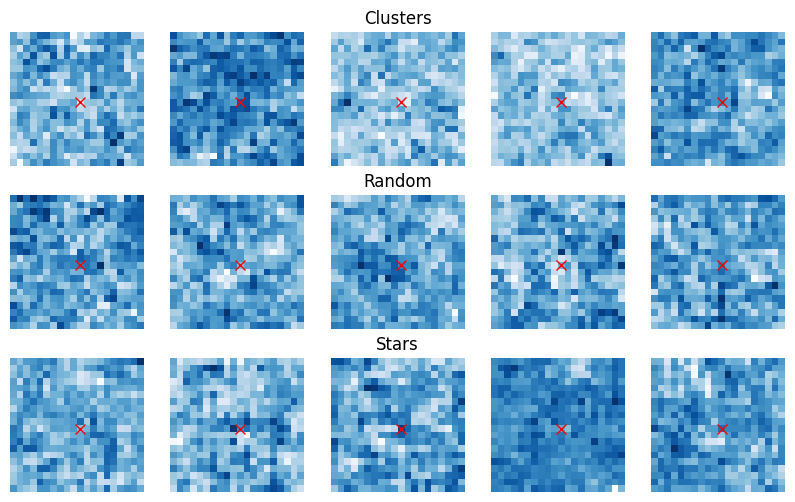

In [85]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

ax[0, 0].imshow(prob_clust0.reshape(20,20), cmap = cm.Blues)
ax[0, 1].imshow(prob_clust1.reshape(20,20), cmap = cm.Blues)
ax[0, 2].imshow(prob_clust2.reshape(20,20), cmap = cm.Blues)
ax[0, 3].imshow(prob_clust3.reshape(20,20), cmap = cm.Blues)
ax[0, 4].imshow(prob_clust4.reshape(20,20), cmap = cm.Blues)

ax[0, 2].set_title('Clusters')
ax[1, 2].set_title('Random')
ax[2, 2].set_title('Stars')

ax[1, 0].imshow(prob_r0.reshape(20,20), cmap = cm.Blues)
ax[1, 1].imshow(prob_r1.reshape(20,20), cmap = cm.Blues)
ax[1, 2].imshow(prob_r2.reshape(20,20), cmap = cm.Blues)
ax[1, 3].imshow(prob_r3.reshape(20,20), cmap = cm.Blues)
ax[1, 4].imshow(prob_r4.reshape(20,20), cmap = cm.Blues)

ax[2, 0].imshow(prob_gaia0.reshape(20,20), cmap = cm.Blues)
ax[2, 1].imshow(prob_gaia1.reshape(20,20), cmap = cm.Blues)
ax[2, 2].imshow(prob_gaia2.reshape(20,20), cmap = cm.Blues)
ax[2, 3].imshow(prob_gaia3.reshape(20,20), cmap = cm.Blues)
ax[2, 4].imshow(prob_gaia4.reshape(20,20), cmap = cm.Blues)

for j in range(3):
    for i in range(5):
        ax[j, i].axis('off')
        ax[j, i].plot(10, 10, 'x', ms=7, color='red')

plt.show()

In [94]:
folderlocation = './data/example/Big'

path = folderlocation
os.makedirs(path, exist_ok=True)

In [95]:
df = pd.concat([test_dr5, data_macdows], ignore_index=True)

In [96]:
cl0 = df[df.target==1].sample(1, random_state=1).reset_index(drop=True)
cl0

,Component_name,RA,DEC,target
0,MOO J0157-1556,29.252917,-15.943611,1


In [97]:
createSegMap(1, cl0.loc[0, 'RA'], cl0.loc[0, 'DEC'], cl0.loc[0, 'Component_name'], dire='./data/example/Big')

45


In [98]:
prob_big = predict_folder('./data/example/Big', device=device)

(-0.5, 29.5, 29.5, -0.5)

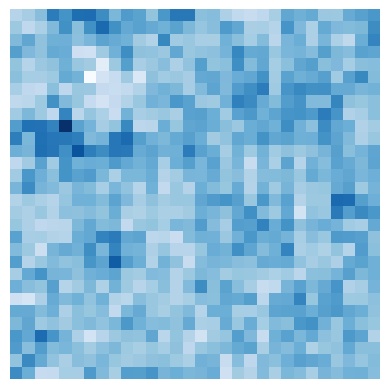

In [99]:
plt.imshow(prob_big.reshape(30, 30), cmap=cm.Blues)
plt.axis('off')